# what is the difference between inner product and outer product?

## inner product?
* when you take dot product between 2 vectors a.T@b and you get a single value as the result then the operation is a inner product.

## outer product:
* when you take dot product between 2 vectors a.T@b and you get a matrix as the result then the operation is a outer product.

## Give one example where outer product is used in ML?
* it is used to create kernal matrix in support vector machine algorithm.
* kernal matrix is used to find similarities between features/datapoints in higher dimensional space.
* outer product is used to find the feature interactions and similarities.
* outer product is used to extract visual information(image)

## Essence:
* in essence, inner product condenses information into a single scaler value. outer product expands information into a matrix.



# day 350

In [2]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

In [20]:
# find outer product of the 2 vectors
a = np.array([[3,2,1]])
b = np.array([[-1,0,1]])

np.outer(a,b)

array([[-3,  0,  3],
       [-2,  0,  2],
       [-1,  0,  1]])

## exploration,analysis and freethrows

In [24]:
# how outer product works
a.T@b

array([[-3,  0,  3],
       [-2,  0,  2],
       [-1,  0,  1]])

In [16]:
# how inner product works?
np.inner(a,b)

array([[-2]])

In [17]:
# how inner product works?
a@b.T

array([[-2]])

# what does it mean for 2 vectors to be linearly independent?

* 2 linearly independent vectors means they each got unique information in them to span the whole 2d ambient space.
* their rank is full 2.
* one vector cannot be produced by linearly scaling or shifting the other vector hence they both represent 2 different dimensions in the space because of their linear independency.

# day 351

`Given two set of vectors, A= (a1,a2,a3......an) B= (b1,b2,b3...... bn), how do you check that they share the same basis?`

ans:
There are two main approaches to check if sets A and B share the same basis in general (not necessarily using NumPy):

**1. Checking Dimension and Spanning:**

*  **Dimension Check:** If the number of elements in A (n) is not equal to the number of elements in B (n), they cannot be bases for the same space. A basis has a specific number of vectors equal to the dimension of the space.
*  **Spanning Check (theoretical):** Ideally, you'd want to show that every vector in the space spanned by A can be expressed as a linear combination of vectors from B, and vice versa. This can be mathematically proven, but for larger sets, it might be impractical.

**2. Checking Linear Independence (indirect method):**

This approach focuses on one set and checks if the other set's vectors can be expressed as linear combinations of the first set's vectors. If so, and both sets have the same dimension, they likely share the same basis. Here's how:

1. Choose one set, say A.
2. For each vector in the other set (B):
    * Try to express that vector (b_i) as a linear combination of the vectors in A (a_j) using the equation:
        b_i = c_1 * a_1 + c_2 * a_2 + ... + c_n * a_n (where c_j are coefficients)
    * Solve a system of linear equations with the coefficients (c_j) as unknowns.
3. If for every vector (b_i) in B, you can find a **unique solution** (not all coefficients c_j are zero) to the system of equations, then set A spans the same space as set B. 

**Important Note:**

This approach assumes that both sets have the same dimension. Even if both sets span the same space, they might not be exactly the same basis. They could be different linear combinations of the same fundamental vectors.


In [6]:
import numpy as np

def same_basis(set1, set2):
    
    # Check dimension compatibility
    if set1.shape[1] != set2.shape[1]:
        return False

    # Try to express each vector in set2 as a linear combination of set1
    for v2 in set2:
        # Solve the system of linear equations (Ax = b)
        A, b = set1.T, v2.reshape(-1, 1)
        x, _, _, _ = np.linalg.lstsq(A, b, rcond=None)

        # Check for a unique solution (not all coefficients zero)
        if np.allclose(x, np.zeros_like(x)):
            return False

    # If all vectors in set2 can be expressed from set1, they share the same basis
    return True

# Example usage
set1 = np.array([[1, 2], [3, 1]])
set2 = np.array([[1, 1], [6, 5]])  # Linear combination of set1

# Check if the sets share the same basis
basis_match = same_basis(set1, set2)

print("Do the sets share the same basis?", basis_match)


Do the sets share the same basis? True


## exploration, analysis and freethrows

In [8]:
set1.shape[1]

2

In [9]:
set2.shape[1]

2

In [10]:
for v2 in set2:
    print(v2)

[1 1]
[6 5]


In [13]:
for v2 in set2:
    A,b = set1.T, v2.reshape(-1,1)
    
    print('A: ')
    display(A)
    print(' ')
    print('b: ')
    display(b)

A: 


array([[1, 3],
       [2, 1]])

 
b: 


array([[1],
       [1]])

A: 


array([[1, 3],
       [2, 1]])

 
b: 


array([[6],
       [5]])

In [8]:
for v2 in set2:
        # Solve the system of linear equations (Ax = b)
        A, b = set1.T, v2.reshape(-1, 1)
        x, _, _, _ = np.linalg.lstsq(A, b, rcond=None)
        print('x:')
        display(x)
        


x:


array([[0.4],
       [0.2]])

x:


array([[1.8],
       [1.4]])

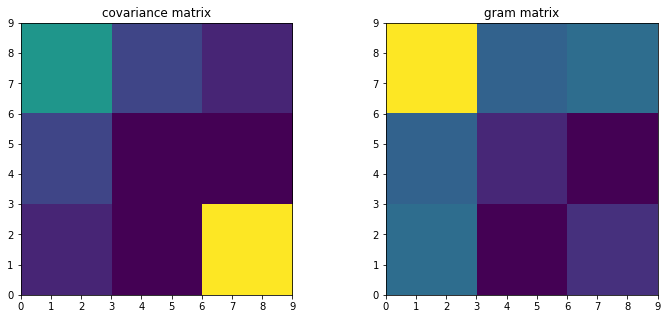

In [3]:
import numpy as np
import matplotlib.pyplot as plt

A = np.random.randint(0,9,(3,3))

cov_mat = A.T@A
gram_mat = A@A.T

fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].imshow(cov_mat,extent=[0,9,0,9])
ax[0].set_title('covariance matrix')
ax[1].imshow(gram_mat,extent=[0,9,0,9])
ax[1].set_title('gram matrix')
plt.show()

In [4]:
cov_mat

array([[66, 60, 58],
       [60, 56, 56],
       [58, 56, 75]])

In [5]:
gram_mat

array([[134,  54,  59],
       [ 54,  30,  17],
       [ 59,  17,  33]])

In [12]:
import numpy as np
A = np.array([[1,2,3],
              [4,7,2]]
              )
b = np.array([1,4])

np.linalg.lstsq(A,b,rcond=None)

(array([ 0.25897436,  0.43589744, -0.04358974]),
 array([], dtype=float64),
 2,
 array([8.83176087, 2.23606798]))

In [13]:
np.linalg.det(A) # so it is zero

LinAlgError: Last 2 dimensions of the array must be square